<a href="/assets/lecture01_code.ipynb" class="link-button">Download</a>
<a href="https://colab.research.google.com/github/technion046195/technion046195/blob/master/content/lecture01/code.ipynb" target="_blank">
<img src="../assets/colab-badge.svg" style="display:inline"/>
</a>

<center><h1>
הרצאה 1 - מבוא
</h1></center>

## Setup

In [ ]:
## Importing packages
import os # A build in package for interacting with the OS. For example to create a folder.
import numpy as np  # Numerical package (mainly multi-dimensional arrays and linear algebra)
import pandas as pd  # A package for working with data frames
import matplotlib.pyplot as plt  # A plotting package
import imageio  # A package to read and write image (is used here to save gif images)

## Setup matplotlib to output figures into the notebook
## - To make the figures interactive (zoomable, tooltip, etc.) use ""%matplotlib notebook" instead
%matplotlib inline

## Setting some nice matplotlib defaults
plt.rcParams['figure.figsize'] = (4.5, 4.5)  # Set default plot's sizes
plt.rcParams['figure.dpi'] = 120  # Set default plot's dpi (increase fonts' size)
plt.rcParams['axes.grid'] = True  # Show grid by default in figures

## Auxiliary function for prining equations, pandas tables and images in cells output
from IPython.core.display import display, HTML, Latex

## Create output folder
if not os.path.isdir('./output'):
    os.mkdir('./output')

## Missing number

In [ ]:
data = np.array([
    [0, 2],
    [1, 4],
    [3, 16],
])

x_grid = np.arange(0, 4, 0.1)

### Plot problem

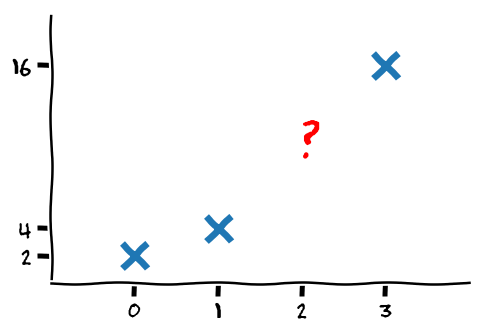

In [ ]:
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(4.5, 3))
    # ax.set_title(r'$p_{t|p}(t|p)$')
    ax.plot(data[:, 0], data[:, 1], 'x', ms=15, mew=4)
    ax.text(2, 10, '?', size=25, color='red')
    
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_xlim(-1, 4)
    ax.set_ylim(0, 20)
    ax.set_xticks([0, 1, 2, 3])
    ax.set_yticks([2, 4, 16])

fig.savefig('./output/missing_number.png', dpi=240)

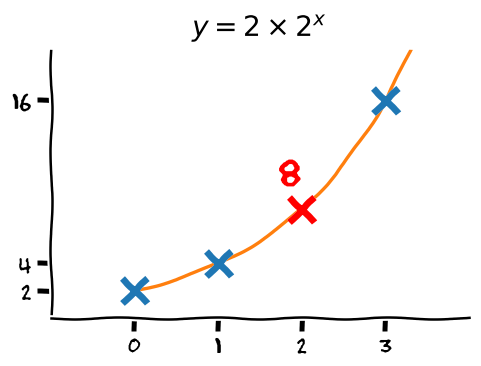

In [ ]:
f = lambda x: 2 * 2 ** x
y_exp = f(x_grid)
res_exp = f(2)

with plt.xkcd():
    fig, ax = plt.subplots(figsize=(4.5, 3))
    ax.plot(data[:, 0], data[:, 1], 'x', ms=15, mew=4)
    ax.plot(x_grid, y_exp, zorder=-1)
    ax.plot(2, res_exp, 'x', color='red', ms=15, mew=4)
    ax.text(2, res_exp + 2, f'{res_exp:.2g}', size=25, color='red', ha='right')

    ax.set_title(r'$y=2\times2^{x}$')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_xlim(-1, 4)
    ax.set_ylim(0, 20)
    ax.set_xticks([0, 1, 2, 3])
    ax.set_yticks([2, 4, 16])

fig.savefig('./output/missing_number_exp.png', dpi=240)

In [ ]:
x_mat = data[:, 0, None] ** np.array([0, 1, 2])
theta = np.linalg.solve(x_mat, data[:, 1])
f = lambda x: theta[0] + theta[1] * x + theta[2] * x ** 2
print(f'Polinomial coeffs: a={theta[0]:.3g}, b={theta[1]:.3g}, c={theta[2]:.3g}')

Polinomial coeffs: a=2, b=0.667, c=1.33


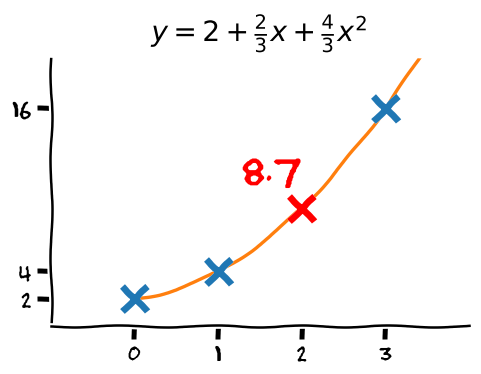

In [ ]:
y_poly = f(x_grid)
res_poly = f(2)

with plt.xkcd():
    fig, ax = plt.subplots(figsize=(4.5, 3))
    ax.plot(data[:, 0], data[:, 1], 'x', ms=15, mew=4)
    ax.plot(x_grid, y_poly, zorder=-1)
    ax.plot(2, res_poly, 'x', color='red', ms=15, mew=4)
    ax.text(2, res_poly + 2, f'{res_poly:.2g}', size=25, color='red', ha='right')

    ax.set_title(r'$y=2+\frac{2}{3}x+\frac{4}{3}x^2$')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_xlim(-1, 4)
    ax.set_ylim(0, 20)
    ax.set_xticks([0, 1, 2, 3])
    ax.set_yticks([2, 4, 16])

fig.savefig('./output/missing_number_poly.png', dpi=240)

In [ ]:
x_mat = np.stack([np.sin(data[:, 0] / 3),
                  np.cos(data[:, 0] / 3),
                  np.sin(data[:, 0] * 2 / 3),
                  ], axis=1)
theta = np.linalg.solve(x_mat, data[:, 1])
f = lambda x: theta[0] * np.sin(x / 3) + theta[1] * np.cos(x / 3) + theta[2] * np.sin(x * 2 / 3)
print(f'Harmonic coeffs: a={theta[0]:.3g}, b={theta[1]:.3g}, c={theta[2]:.3g}')

Harmonic coeffs: a=32.8, b=2, c=-13.9


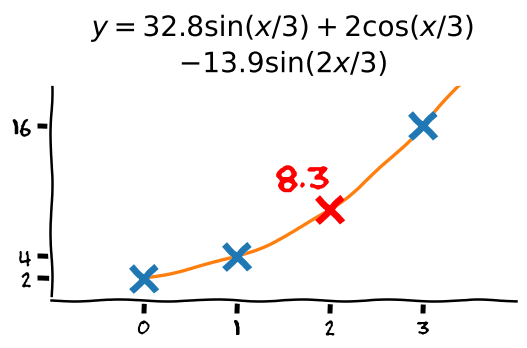

In [ ]:
y_harm = f(x_grid)
res_harm = f(2)

with plt.xkcd():
    fig, ax = plt.subplots(figsize=(4.5, 3))
    ax.plot(data[:, 0], data[:, 1], 'x', ms=15, mew=4)
    ax.plot(x_grid, y_harm, zorder=-1)
    ax.plot(2, res_harm, 'x', color='red', ms=15, mew=4)
    ax.text(2, res_harm + 2, f'{res_harm:.2g}', size=25, color='red', ha='right')

    ax.set_title(f'$y={theta[0]:.3g}\\sin(x/3)+{theta[1]:.3g}\\cos(x/3)$\n${theta[2]:.3g}\\sin(2x/3)$')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_xlim(-1, 4)
    ax.set_ylim(0, 20)
    ax.set_xticks([0, 1, 2, 3])
    ax.set_yticks([2, 4, 16])
plt.tight_layout()
fig.savefig('./output/missing_number_harm.png', dpi=240)

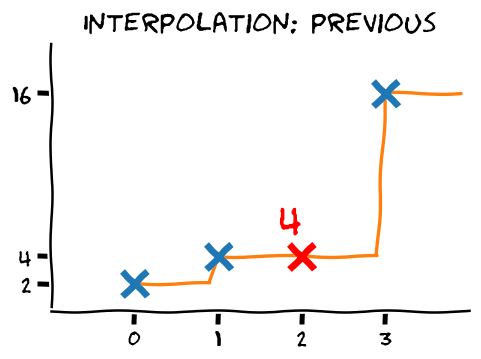

In [ ]:
from scipy import interpolate

f = interpolate.interp1d(data[:, 0], data[:, 1], kind='previous', fill_value="extrapolate")
y_prev = f(x_grid)
res_prev = f(2)

with plt.xkcd():
    fig, ax = plt.subplots(figsize=(4.5, 3))
    ax.plot(data[:, 0], data[:, 1], 'x', ms=15, mew=4)
    ax.plot(x_grid, y_prev, zorder=-1)
    ax.plot(2, res_prev, 'x', color='red', ms=15, mew=4)
    ax.text(2, res_prev + 2, f'{res_prev:.2g}', size=25, color='red', ha='right')

    ax.set_title(f'Interpolation: previous')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_xlim(-1, 4)
    ax.set_ylim(0, 20)
    ax.set_xticks([0, 1, 2, 3])
    ax.set_yticks([2, 4, 16])

fig.savefig('./output/missing_number_prev.png', dpi=240)

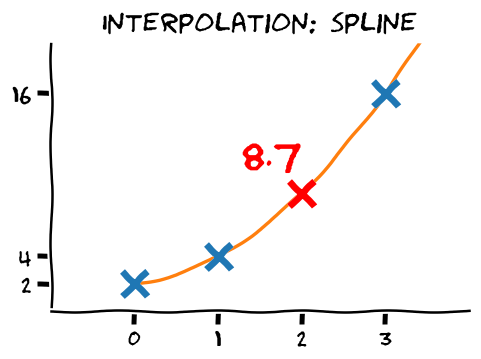

In [ ]:
from scipy import interpolate

spl = interpolate.splrep(data[:, 0], data[:, 1], k=2)
f = lambda x: interpolate.splev(x, spl)
y_spline = f(x_grid)
res_spline = f(2)

with plt.xkcd():
    fig, ax = plt.subplots(figsize=(4.5, 3))
    ax.plot(data[:, 0], data[:, 1], 'x', ms=15, mew=4)
    ax.plot(x_grid, y_spline, zorder=-1)
    ax.plot(2, res_spline, 'x', color='red', ms=15, mew=4)
    ax.text(2, res_spline + 2, f'{res_spline:.2g}', size=25, color='red', ha='right')

    ax.set_title(f'Interpolation: spline')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_xlim(-1, 4)
    ax.set_ylim(0, 20)
    ax.set_xticks([0, 1, 2, 3])
    ax.set_yticks([2, 4, 16])

fig.savefig('./output/missing_number_spline.png', dpi=240)

## Drive duration prediction

In [ ]:
gt_model = lambda x: 60 + 120 * (1 - 0.5 ** (x / 200))
std = 5

rand_gen = np.random.RandomState(42)
x_train = rand_gen.randint(0, 1000, 20)
y_train = gt_model(x_train) + rand_gen.randn(*x_train.shape) * std

x_grid = np.arange(0, 1000, 1)
x0 = 500

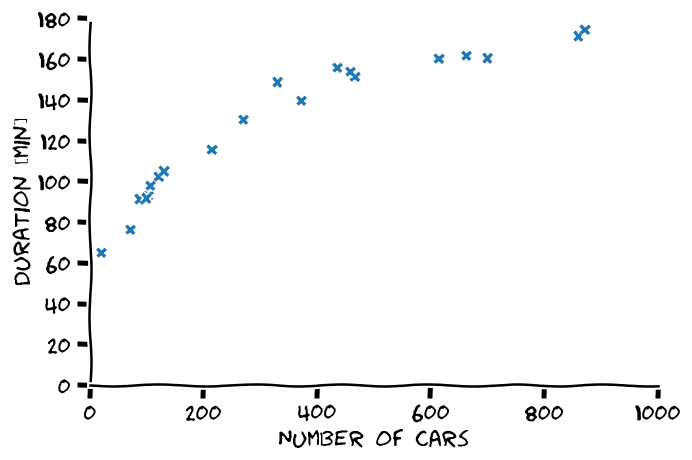

In [ ]:
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(x_train, y_train, 'x', ms=5, mew=2)

    # ax.set_title(f'')
    ax.set_ylabel('Duration [min]')
    ax.set_xlabel('Number of cars')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_xlim(0, 1000)
    ax.set_ylim(0, 180)
    plt.tight_layout()    
fig.savefig('./output/drive_prediction_dataset.png', dpi=240)

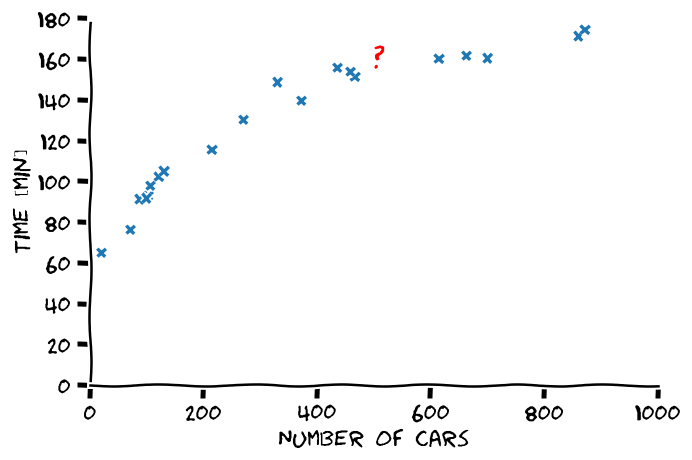

In [ ]:
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(x_train, y_train, 'x', ms=5, mew=2)
    ax.text(x0, gt_model(x0), '?', size=15, color='red')

    # ax.set_title(f'')
    ax.set_ylabel('Duration [min]')
    ax.set_xlabel('Number of cars')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_xlim(0, 1000)
    ax.set_ylim(0, 180)
    plt.tight_layout()    
fig.savefig('./output/drive_prediction.png', dpi=240)

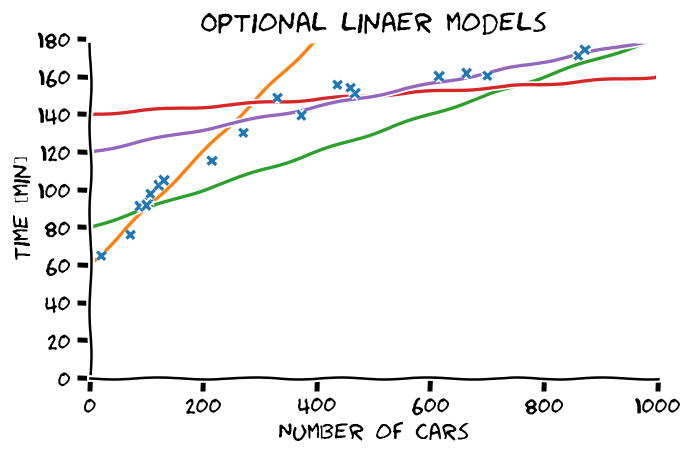

In [ ]:
models = ((60, 0.3), (80, 0.1), (140, 0.02), (120, 0.06))
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(x_train, y_train, 'x', ms=5, mew=2)
    for (a, b) in models:
        f = lambda x: a + b *x
        ax.plot(x_grid, f(x_grid), zorder=-1)

    ax.set_title(f'Optional linaer models')
    ax.set_ylabel('Duration [min]')
    ax.set_xlabel('Number of cars')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_xlim(0, 1000)
    ax.set_ylim(0, 180)
    plt.tight_layout()    
fig.savefig('./output/drive_prediction_linear_models.png', dpi=240)

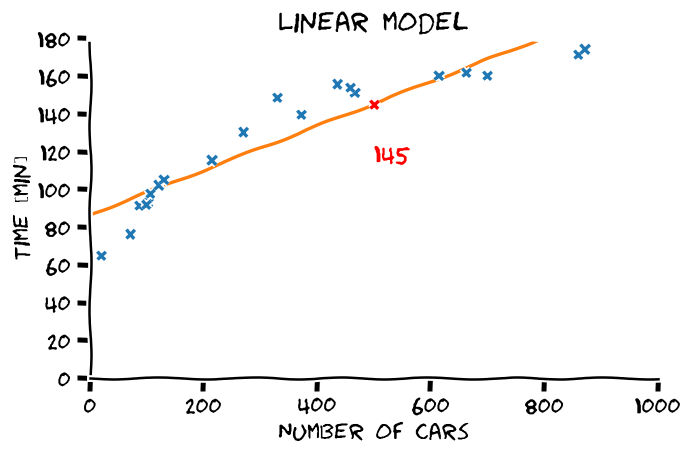

In [ ]:
order = 2
x_mat = x_train[:, None] ** np.arange(order)[None, :]
theta = np.linalg.lstsq(x_mat, y_train, rcond=None)[0]
f = lambda x: (x ** np.arange(order)[:, None]).T @ theta

with plt.xkcd():
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(x_train, y_train, 'x', ms=5, mew=2)
    ax.plot(x_grid, f(x_grid), zorder=-1)
    ax.plot(x0, f(x0), 'x', color='red', ms=5, mew=2)
    ax.text(x0, f(x0) - 30, f'{int(f(x0))}', size=15, color='red', ha='left')

    ax.set_title(f'Linear model')
    ax.set_ylabel('Duration [min]')
    ax.set_xlabel('Number of cars')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_xlim(0, 1000)
    ax.set_ylim(0, 180)
    plt.tight_layout()
fig.savefig('./output/drive_prediction_linear.png', dpi=240)

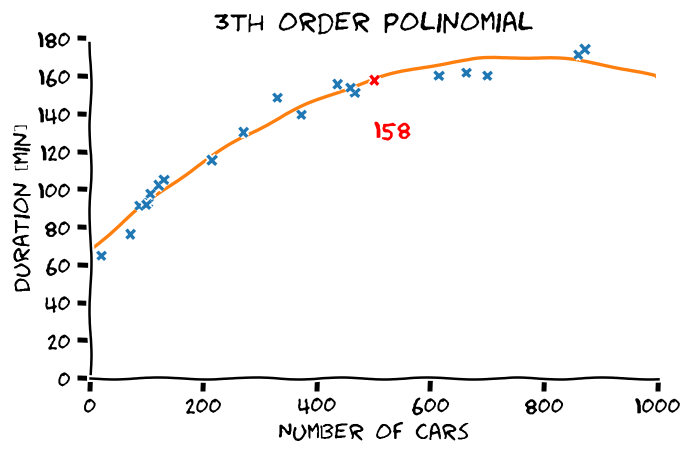

In [ ]:
order = 3
x_mat = x_train[:, None] ** np.arange(order)[None, :]
theta = np.linalg.lstsq(x_mat, y_train, rcond=None)[0]
f = lambda x: (x ** np.arange(order)[:, None]).T @ theta

with plt.xkcd():
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(x_train, y_train, 'x', ms=5, mew=2)
    ax.plot(x_grid, f(x_grid), zorder=-1)
    ax.plot(x0, f(x0), 'x', color='red', ms=5, mew=2)
    ax.text(x0, f(x0) - 30, f'{int(f(x0))}', size=15, color='red', ha='left')

    ax.set_title(f'{order}th order polinomial')
    ax.set_ylabel('Duration [min]')
    ax.set_xlabel('Number of cars')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_xlim(0, 1000)
    ax.set_ylim(0, 180)
    plt.tight_layout()
fig.savefig(f'./output/drive_prediction_poly_{order}.png', dpi=240)

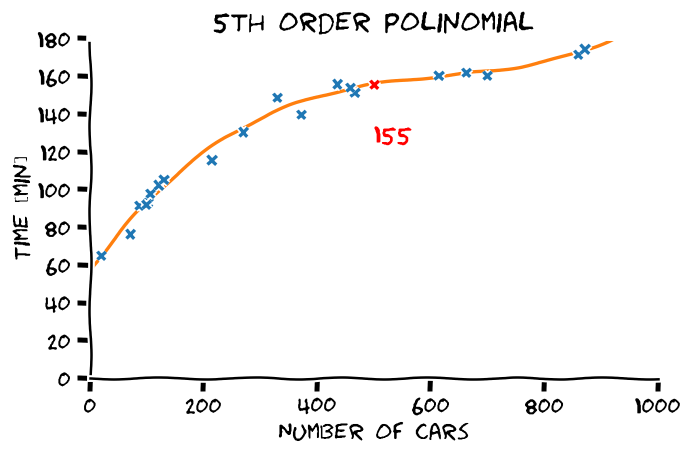

In [ ]:
order = 5
x_mat = x_train[:, None] ** np.arange(order)[None, :]
theta = np.linalg.lstsq(x_mat, y_train, rcond=None)[0]
f = lambda x: (x ** np.arange(order)[:, None]).T @ theta

with plt.xkcd():
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(x_train, y_train, 'x', ms=5, mew=2)
    ax.plot(x_grid, f(x_grid), zorder=-1)
    ax.plot(x0, f(x0), 'x', color='red', ms=5, mew=2)
    ax.text(x0, f(x0) - 30, f'{int(f(x0))}', size=15, color='red', ha='left')

    ax.set_title(f'5th order polinomial')
    ax.set_ylabel('Duration [min]')
    ax.set_xlabel('Number of cars')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_xlim(0, 1000)
    ax.set_ylim(0, 180)
    plt.tight_layout()
fig.savefig(f'./output/drive_prediction_poly_{order}.png', dpi=240)

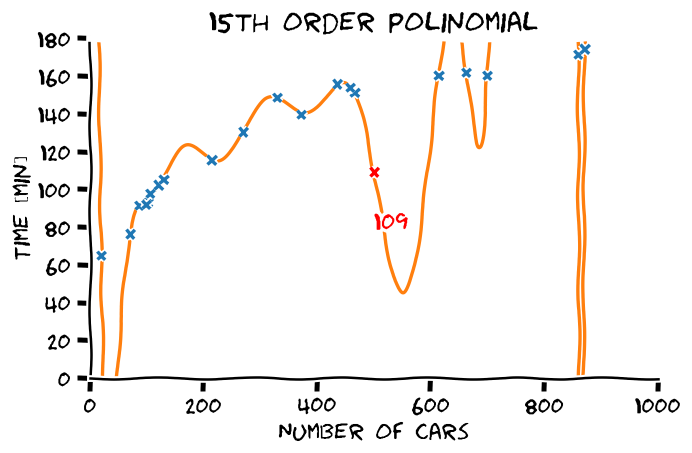

In [ ]:
order = 15
x_mat = (x_train[:, None] / 1000) ** np.arange(order)[None, :]
theta = np.linalg.lstsq(x_mat, y_train, rcond=None)[0]
f = lambda x: ((x / 1000) ** np.arange(order)[:, None]).T @ theta

with plt.xkcd():
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(x_train, y_train, 'x', ms=5, mew=2)
    ax.plot(x_grid, f(x_grid), zorder=-1)
    ax.plot(x0, f(x0), 'x', color='red', ms=5, mew=2)
    ax.text(x0, f(x0) - 30, f'{int(f(x0))}', size=15, color='red', ha='left')

    ax.set_title(f'{order}th order polinomial')
    ax.set_ylabel('Time [min]')
    ax.set_xlabel('Number of cars')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_xlim(0, 1000)
    ax.set_ylim(0, 180)
    plt.tight_layout()
fig.savefig(f'./output/drive_prediction_poly_{order}.png', dpi=240)